In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

Figuras que uso a lo largo de la tesis, para que los estilos sean coherentes.

In [1]:
#%matplotlib inline

import glob
import itertools

import matplotlib
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import tensorflow as tf
import fuzzle.lvars
import fuzzle.mfs
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score

from IPython.display import display

from pynsia.tensorflow import fuzzy as tfz
from pynsia.pointcloud import PointCloud
from thesis_plots import plot_confusion_matrix

plt.style.use('bmh')

Pongo aquí las configuraciones por defecto de tipos de letra, tamaños, colores, etcétera. Estaría muy bien hacer una plantilla más adelante.

In [2]:
matplotlib.rc('legend', **{
    'fontsize': '10',
})
matplotlib.rc('lines', **{
    'linewidth': '1',
})
CMAP = plt.cm.Purples_r

Los valores de las figuras para que los estilos de la tesis sean más o menos homogéneos

In [3]:
SQUARED_2 = 3, 3  # .45\textwidth
SQUARED_M = 3.75, 3.75  # \texwidth, para marginfigure
WIDE_1 = 8, 3  # \textwidth

In [4]:
SUBJECTS = {'edgar': '$S_1$', 'jj': '$S_2$', 'miguel': '$S_3$'}
SUBJECTS_WITH_ALL = {'all': '$S_A$', 'edgar': '$S_1$', 'jj': '$S_2$', 'miguel': '$S_3$'}

# Introducción

## Edad de los conductores por género

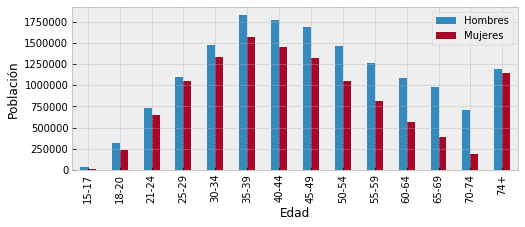

In [19]:
df = pd.DataFrame({
    'Edades':['15-17','18-20','21-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','74+',],
    'Hombres':[39341,318037,729846,1097874,1472038,1828905,1768957,1688069,1460193,1256212,1082591,974768,709285,1190514],
    'Mujeres':[15697,238534,651961,1054377,1337432,1568926,1445740,1321330,1055472,810168,569461,387158,189829,1138945],
})
fig, ax = plt.subplots(1, 1, figsize=WIDE_1)
ax.set_xlabel('Edad')
ax.set_ylabel('Población')
df.plot(kind='bar', ax=ax)
ax.set_xticklabels(df['Edades'])
ax.legend(loc="best");
fig.savefig('thesis-figures/drivers-ages-per-genre.pdf', bbox_inches='tight')

***

# Estado de la cuestión - Inteligencia computacional

## Rise of deep learning

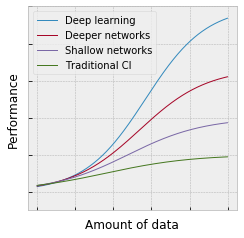

In [20]:
def l(x, a, b, c, k, m, v, q):
    return a + (k - a)/ np.power((c + q * np.exp(-b * (x - m))), 1 / v)


x = np.arange(0.75, 2, 0.001)
y1 = l(x, 0, 5, 0.1, 1, 1, 1, 1)
y2 = l(x, 0, 4.5, 0.15, 1, 1, 1, 1)
y3 = l(x, 0, 4, 0.25, 1, 1, 1, 1)
y4 = l(x, 0, 3.5, 0.5, 1, 1, 1, 1)

# Setup centered axes
fig, ax = plt.subplots(1, 1, figsize=SQUARED_M)
ax.set_ylim((-1, 10))

# Create and show plot
ax.plot(x, y1, label="Deep learning")
ax.plot(x, y2, label="Deeper networks")
ax.plot(x, y3, label="Shallow networks")
ax.plot(x, y4, label="Traditional CI")
ax.legend(loc="best");
ax.set_ylabel('Performance')
ax.set_xlabel('Amount of data')
ax.set_yticklabels([])
ax.set_xticklabels([])
fig.savefig('thesis-figures/deep-learning-capabilities.pdf',bbox_inches='tight')

## Funciones de activación. Sigmoidal

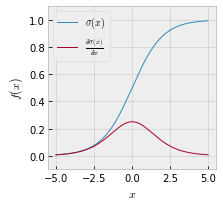

In [21]:
def sigmoid(x):
    return 1./(1+np.e**(-x))

x = np.arange(-5, 5, 0.01)
y = sigmoid(x)
dx = y * (1 - y)

# Setup centered axes
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

ax.set_ylim((-0.1, 1.1))

# Create and show plot
ax.plot(x, y, label="$\sigma(x)$")
ax.plot(x, dx, label="$\\frac{\partial \sigma(x)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('thesis-figures/sigmoid-function.pdf',bbox_inches='tight')

## Funciones de activación. Tangente hiperbólica

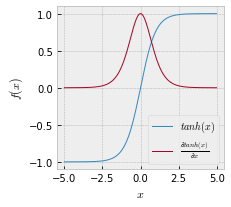

In [22]:
def tanh(x):
    return 1./(1 + np.e ** (-x))

x = np.arange(-5, 5, 0.01)
y = np.tanh(x)
dx = 1 - y ** 2

# Setup centered axes
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_ylim((-1.1, 1.1))

# Create and show plot
ax.plot(x, y, label="$tanh(x)$")
ax.plot(x, dx, label="$\\frac{\partial tanh(x)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('thesis-figures/tanh-function.pdf',bbox_inches='tight')

## Funciones de activación. ReLU

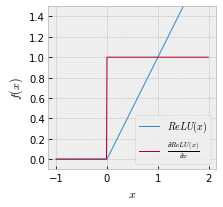

In [23]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-1, 2, 0.01)
y = relu(x)
dx = [0 if r <= 0 else 1 for r in x]

# Setup centered axes
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_ylim((-0.1, 1.5))

# Create and show plot
ax.plot(x, y, label="$ReLU(x)$")
ax.plot(x, dx, label="$\\frac{\partial ReLU(x)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('thesis-figures/relu-function.pdf',bbox_inches='tight')

## Funciones de activación. Leaky ReLU

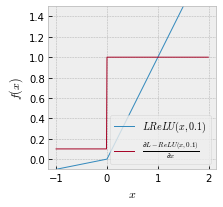

In [24]:
leak = 0.1
def leaky_relu(x):
    return np.maximum(leak * x, x)

x = np.arange(-1, 2, 0.01)
y = leaky_relu(x)
dx = [leak if r <= 0 else 1 for r in x]

# Setup centered axes
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_ylim((-0.1, 1.5))

# Create and show plot
ax.plot(x, y, label="$LReLU(x, 0.1)$")
ax.plot(x, dx, label="$\\frac{\partial L-ReLU(x, 0.1)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('thesis-figures/leaky-relu-function.pdf',bbox_inches='tight')

## Funciones de pertenencia. Trangular y trapezoidal

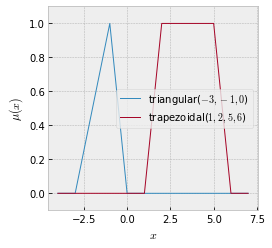

In [27]:
def f(x, a, Δb, Δc, Δd):
    line_asc = (x - a) / Δb
    line_des = (a + Δb + Δc - x) / Δd + 1
    union = min(line_asc, line_des)
    return min(max(union, 0), 1)

x = np.arange(-4, 7, 0.01)
trimf = [f(e, -3, 2, 0, 1) for e in x]
trapmf = [f(e, 1, 1, 3, 1) for e in x]

# Setup centered axes
fig, ax = plt.subplots(1, 1, figsize=SQUARED_M)
ax.set_xlabel('$x$')
ax.set_ylabel('$\mu(x)$')
ax.set_ylim((-0.1, 1.1))

# Create and show plot
ax.plot(x, trimf, label="triangular($-3, -1, 0$)")
ax.plot(x, trapmf, label="trapezoidal($1, 2, 5, 6$)")
ax.legend(loc="best");
fig.savefig('thesis-figures/trimf-trapmf.pdf',bbox_inches='tight')

## T-normas. Mínimo

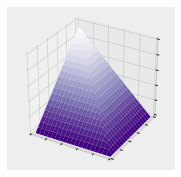

In [30]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X = np.arange(0, 1, 0.05)
Y = np.arange(0, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = np.minimum(X, Y)

fig = plt.figure(figsize=SQUARED_2)
ax = fig.gca(projection='3d')
ax.set_xlim(1, 0)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
surf = ax.plot_surface(X, Y, Z, cmap=CMAP);
fig.savefig('thesis-figures/tnorm-minimum.pdf',bbox_inches='tight')

## T-normas. Producto algebráico

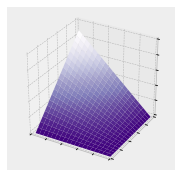

In [31]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X = np.arange(0, 1, 0.05)
Y = np.arange(0, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X * Y

fig = plt.figure(figsize=SQUARED_2)
ax = fig.gca(projection='3d')
ax.set_xlim(1, 0)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
surf = ax.plot_surface(X, Y, Z, cmap=CMAP);
fig.savefig('thesis-figures/tnorm-algebraic-product.pdf',bbox_inches='tight')

## T-conormas. Maximo

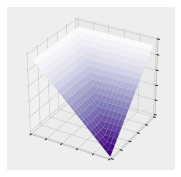

In [32]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X = np.arange(0, 1, 0.05)
Y = np.arange(0, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = np.maximum(X, Y)

fig = plt.figure(figsize=SQUARED_2)
ax = fig.gca(projection='3d')
ax.set_xlim(1, 0)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
surf = ax.plot_surface(X, Y, Z, cmap=CMAP);
fig.savefig('thesis-figures/snorm-maximum.pdf',bbox_inches='tight')

## T-conormas. Suma algebráica

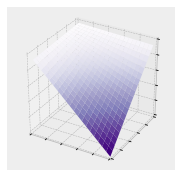

In [33]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X = np.arange(0, 1, 0.05)
Y = np.arange(0, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X + Y - X * Y

fig = plt.figure(figsize=SQUARED_2)
ax = fig.gca(projection='3d')
ax.set_xlim(1, 0)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
surf = ax.plot_surface(X, Y, Z, cmap=CMAP);
fig.savefig('thesis-figures/snorm-probabilistic-sum.pdf',bbox_inches='tight')

***

# Estado de la cuestión - Simulación de tráfico

Ningún gráfico

***

# Estado de la cuestión - Modelos de comportamiento

Ningún gráfico

***

# Modelos de comportamiento - Metodología

Ningún gráfico

## Perfiles de aceleración en los conjuntos de entrenamiento y test

In [34]:
df = pd.read_csv('data/cf-all-training.csv', index_col=None)
fig, ax = plt.subplots(1, 1, figsize=(WIDE_1[0], WIDE_1[1]))
ax.set_ylim(-0.35, 0.35)
df['Acceleration'].plot(ax=ax, label="Acceleration ($m/s^2$)");
ax.legend(loc="best");
fig.savefig('thesis-figures/acceleration-profiles-training.pdf',bbox_inches='tight')

df = pd.read_csv('data/cf-all-validation.csv', index_col=None)
fig, ax = plt.subplots(1, 1, figsize=(WIDE_1[0], WIDE_1[1]))
ax.set_ylim(-0.35, 0.35)
df['Acceleration'].plot(ax=ax, label="Acceleration ($m/s^2$)");
ax.legend(loc="best");
fig.savefig('thesis-figures/acceleration-profiles-test.pdf',bbox_inches='tight')

FileNotFoundError: File b'data/cf-all-training.csv' does not exist

# Modelos de comportamiento - Modelo longitudinal

Para todos los resultados que van en función de los epochs, el eje $X$ se ha limitado a 100. Todas las salidas se han ajustado a este criterio independientemente del número de epochs que haya requerido su entrenamiento.

In [35]:
EPOCHS_X_LIM = (0, 100)

## Controlador difuso

Los patrones de los ficheros que tienen los valores de las salidas y los RMS son los siguientes:

In [36]:
lm_fcs_rms_f_pat = 'final-outputs/cf-fcs-rms-all-*.csv'
lm_fcs_out_f_pat = 'final-outputs/cf-fcs-outputs-all-*.csv'

Extraemos los datos de los ficheros a sus respectivos dataframes para trabajar con ellos

In [37]:
lm_fcs_rms_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lm_fcs_rms_f_pat), key=lambda x: (len(x), x))
]
lm_fcs_out_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lm_fcs_out_f_pat), key=lambda x: (len(x), x))
]

Por último, sacamos los nombres de las arquitecturas

In [38]:
lm_fcs_architectures = {
    s.replace('.csv', '').replace(lm_fcs_rms_f_pat[:-5], ''): '$FCS_{}$'.format(i)
    for i, s in enumerate(sorted(glob.glob(lm_fcs_rms_f_pat), key=lambda x: (len(x), x)), start=1)
}

### Tabla de errores

In [39]:
table = {
    'architecture':[],
    'training':[],
    'validation':[],
    'test':[],
    'topology': [],
}
for i, (architecture, df) in enumerate(zip(lm_fcs_architectures, lm_fcs_rms_dfs)):
    table['architecture'].append(lm_fcs_architectures[architecture])
    table['training'].append(df['training'].iloc[-1])
    table['validation'].append(df['validation'].iloc[-1])
    table['test'].append(df['test'].iloc[-1])
    table['topology'].append(architecture)
df = pd.DataFrame(table, index=None)[['architecture', 'training', 'validation', 'test', 'topology']]
df.set_index('architecture')

,training,validation,test,topology
architecture,,,,
$FCS_1$,0.058634,0.063628,0.062973,2-2-2-2-2-2-2
$FCS_2$,0.073221,0.079094,0.079965,3-3-2-2-2-3-3
$FCS_3$,0.071709,0.078142,0.087893,4-3-2-2-2-3-3
$FCS_4$,0.062540,0.068416,0.108904,5-5-2-2-2-5-5


### RMSE en training, validation y test

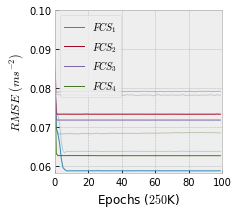

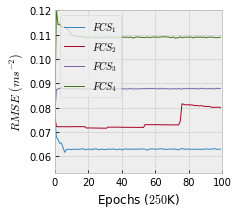

In [43]:
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('Epochs ($250$K)')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(*EPOCHS_X_LIM)
ax.set_ylim(0.058, 0.1)
stage_df = pd.DataFrame()
lines_training = []
lines_validation = []
for i, (architecture, df) in enumerate(zip(lm_fcs_architectures, lm_fcs_rms_dfs)):
    lines_training += ax.plot(df['training'], label=lm_fcs_architectures[architecture], color='C{}'.format(i))
    lines_validation += ax.plot(df['validation'], color='C{}'.format(i), alpha=0.3)
ax.legend(handles=lines_training, loc=2)
fig.savefig('thesis-figures/lm-fcs-rmse-all-training-and-validation-detail.pdf', bbox_inches='tight')

# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('Epochs ($250$K)')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(*EPOCHS_X_LIM)
ax.set_ylim(0.053, 0.12)
for i, (architecture, df) in enumerate(zip(lm_fcs_architectures, lm_fcs_rms_dfs)):
    lines_training += ax.plot(df['test'], label=lm_fcs_architectures[architecture], color='C{}'.format(i))
ax.legend(*ax.get_legend_handles_labels(), loc=2)
fig.savefig('thesis-figures/lm-fcs-rmse-all-test-detail.pdf', bbox_inches='tight')

### Particiones difusas de las variables lingüísticas

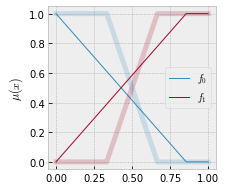

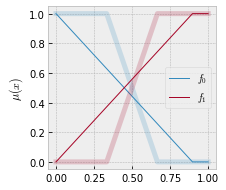

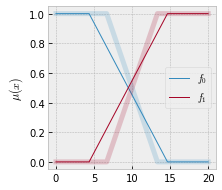

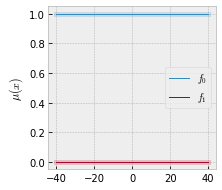

In [47]:
best_fcs_arch = '2-2-2-2-2-2-2'

lm_fcs_df = pd.read_csv('final-outputs/cf-fcs-description-all-{}.csv'.format(best_fcs_arch), index_col=None)

VARIABLES = [
    ('Leader distance', 'LeaderDistance', (0, 1)), ('Next TLS distance', 'NextTLSDistance', (0, 1)),
    ('Next TLS green', 'NextTLSGreen', (0, 1)), ('Next TLS yellow', 'NextTLSYellow', (0, 1)),
    ('Next TLS red', 'NextTLSRed', (0, 1)), ('Speed', 'Speed', (0, 20)),
    ('Speed to leader', 'SpeedToLeader', (-40, 40)),
]

first_row = lm_fcs_df.iloc[0]
last_row = lm_fcs_df.iloc[-1]
lvars = [[], []]
for var_index, current_row in enumerate([first_row, last_row]):
    vars_values = [
        {k.split('/')[-1]: v for k, v in current_row.items() if k.startswith('tfz/var/' + variable + '/')}
        for _, variable, _ in VARIABLES
    ]
    for var_description, (variable_name, variable, domain) in zip(vars_values, VARIABLES):
        for k, v in var_description.items():
            var_description[k] = np.abs(v)
        base = var_description['b']
        next_starting_point = base + var_description['s0']
        num_fs = ((len(var_description) - 1) // 2) + 1

        lvar = fuzzle.lvars.InputLVar(variable_name, domain)
        for i in range(num_fs):
            if i == 0:
                b = next_starting_point + var_description['s1']
                mf = fuzzle.mfs.LineDescMF(next_starting_point, b)
            elif i == num_fs - 1:
                last = len(var_description) - 2           
                b = next_starting_point + var_description['s{}'.format(last)]
                mf = fuzzle.mfs.LineAscMF(next_starting_point, b)
            else:
                sta = ['s' + str(j) for j in range(i * 2 - 1, i * 2 + 2)]
                b = next_starting_point + var_description[sta[0]]
                c = b + var_description[sta[1]]
                d = c + var_description[sta[2]]
                mf = fuzzle.mfs.TrapMF(next_starting_point, b, c, d)
                next_starting_point = c

            lvar['$f_{}$'.format(i)] = mf
        lvars[var_index].append(lvar)

for var1, var2 in zip(lvars[0], lvars[1]):
    if var1.name not in ('Next TLS green', 'Next TLS yellow', 'Next TLS red'):
        mf_names = [fs for fs in var1]
        X = np.linspace(*var1.domain, 1000)
        Y1 = np.array([
            [var1[mf_name](x) for mf_name in mf_names]
            for x in X
        ])
        Y2 = np.array([
            [var2[mf_name](x) for mf_name in mf_names]
            for x in X
        ])
        X = np.reshape(X, (-1, 1))

        # Plot the mfs
        fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
        ax.set_ylabel('$\mu(x)$')
        for i, (column1, column2, label) in enumerate(zip(Y1.T, Y2.T, mf_names)):
            ax.plot(X[:,0], column1, alpha=0.2, linewidth=5, color='C' + str(i));
            ax.plot(X[:,0], column2, alpha=1, label=label, color='C' + str(i));
        ax.legend(loc='best');
        var_name = var1.name.lower().replace(' ', '-').replace('(', '').replace(')', '').replace(',', '')
        fig.savefig('thesis-figures/lm-fcs-best-architecture-{}-variable-partition.pdf'.format(var_name), bbox_inches='tight')

### Aproximación al conjunto de test por las arquitecturas

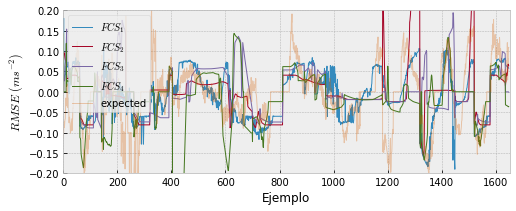

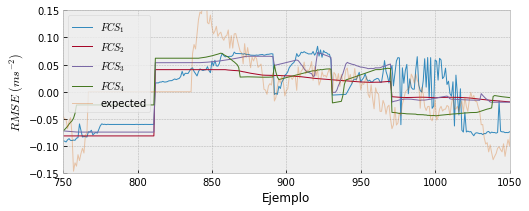

In [50]:
# Aproximación al conjunto de error
lm_fcs_outs_df = pd.DataFrame()
for architecture, df in zip(lm_fcs_architectures, lm_fcs_out_dfs):
    lm_fcs_outs_df[lm_fcs_architectures[architecture]] = df['real']
# General
fig, ax = plt.subplots(1, 1, figsize=WIDE_1)
ax.set_xlabel('Ejemplo')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(0, 1650)
ax.set_ylim(-0.2, 0.2)
lm_fcs_outs_df.plot(ax=ax);
ax.plot(lm_fcs_out_dfs[0]['expected'], alpha=0.3, linewidth=1, label='expected');
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/lm-fcs-outs-all-test-comparison.pdf', bbox_inches='tight')

# Detail
fig, ax = plt.subplots(1, 1, figsize=WIDE_1)
ax.set_xlabel('Ejemplo')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(750, 1050)
ax.set_ylim(-0.15, 0.15)
lm_fcs_outs_df.plot(ax=ax);
ax.plot(lm_fcs_out_dfs[0]['expected'], alpha=0.3, linewidth=1, label='expected');
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/lm-fcs-outs-all-test-comparison-detail.pdf', bbox_inches='tight')

## Perceptrón multicapa

Los patrones de los ficheros que tienen los valores de las salidas y los RMS son los siguientes:

In [51]:
lm_mlp_rms_f_pat = 'final-outputs/cf-mlp-rms-all-*.csv'
lm_mlp_out_f_pat = 'final-outputs/cf-mlp-outputs-all-*.csv'

Extraemos los datos de los ficheros a sus respectivos dataframes para trabajar con ellos

In [52]:
lm_mlp_rms_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lm_mlp_rms_f_pat), key=lambda x: (len(x), x))
]
lm_mlp_out_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lm_mlp_out_f_pat), key=lambda x: (len(x), x))
]

Por último, sacamos los nombres de las arquitecturas

In [53]:
lm_mlp_architectures = {
    s.replace('.csv', '').replace(lm_mlp_rms_f_pat[:-5], ''): '$MLP_{}$'.format(i)
    for i, s in enumerate(sorted(glob.glob(lm_mlp_rms_f_pat), key=lambda x: (len(x), x)), start=1)
}

### Tabla de errores

In [54]:
table = {
    'architecture':[],
    'training':[],
    'validation':[],
    'test':[],
    'topology': []
}
for i, (architecture, df) in enumerate(zip(lm_mlp_architectures, lm_mlp_rms_dfs)):
    table['architecture'].append(lm_mlp_architectures[architecture])
    table['training'].append(df['training'].iloc[-1])
    table['validation'].append(df['validation'].iloc[-1])
    table['test'].append(df['test'].iloc[-1])
    table['topology'].append(architecture)
df = pd.DataFrame(table, index=None)[['architecture', 'training', 'validation', 'test', 'topology']]
df.set_index('architecture')

,training,validation,test,topology
architecture,,,,
$MLP_1$,0.052741,0.057301,0.059253,7-16-1
$MLP_2$,0.056341,0.061951,0.056607,7-8-2-1
$MLP_3$,0.046404,0.051878,0.059681,7-16-8-1
$MLP_4$,0.042789,0.046876,0.060971,7-16-16-8-1


### RMSE en training, validation y test

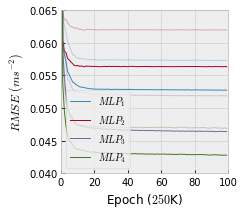

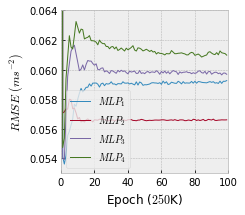

In [60]:
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('Epoch ($250$K)')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(*EPOCHS_X_LIM)
ax.set_ylim(0.04, 0.065)
stage_df = pd.DataFrame()
lines_training = []
lines_validation = []
for i, (architecture, df) in enumerate(zip(lm_mlp_architectures, lm_mlp_rms_dfs)):
    lines_training += ax.plot(df['training'], label=lm_mlp_architectures[architecture], color='C{}'.format(i))
    lines_validation += ax.plot(df['validation'], color='C{}'.format(i), alpha=0.3)
ax.legend(handles=lines_training, loc=3)
fig.savefig('thesis-figures/lm-mlp-rmse-all-training-and-validation-detail.pdf', bbox_inches='tight')

# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('Epoch ($250$K)')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(*EPOCHS_X_LIM)
ax.set_ylim(0.053, 0.064)
for i, (architecture, df) in enumerate(zip(lm_mlp_architectures, lm_mlp_rms_dfs)):
    lines_training += ax.plot(df['test'], label=lm_mlp_architectures[architecture], color='C{}'.format(i))
ax.legend(*ax.get_legend_handles_labels(), loc=3)
fig.savefig('thesis-figures/lm-mlp-rmse-all-test-detail.pdf', bbox_inches='tight')

### Aproximación al conjunto de test por las arquitecturas

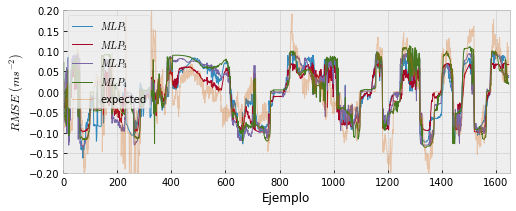

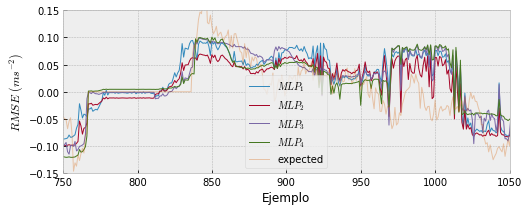

In [62]:
# Aproximación al conjunto de error
lm_mlp_outs_df = pd.DataFrame()
for architecture, df in zip(lm_mlp_architectures, lm_mlp_out_dfs):
    lm_mlp_outs_df[lm_mlp_architectures[architecture]] = df['real']
# General
fig, ax = plt.subplots(1, 1, figsize=WIDE_1)
ax.set_xlabel('Ejemplo')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(0, 1650)
ax.set_ylim(-0.2, 0.2)
lm_mlp_outs_df.plot(ax=ax);
ax.plot(lm_mlp_out_dfs[0]['expected'], alpha=0.3, linewidth=1, label='expected');
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/lm-mlp-outs-all-test-comparison.pdf', bbox_inches='tight')

# Detail
fig, ax = plt.subplots(1, 1, figsize=WIDE_1)
ax.set_xlabel('Ejemplo')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(750, 1050)
ax.set_ylim(-0.15, 0.15)
lm_mlp_outs_df.plot(ax=ax);
ax.plot(lm_mlp_out_dfs[0]['expected'], alpha=0.3, linewidth=1, label='expected');
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/lm-mlp-outs-all-test-comparison-detail.pdf', bbox_inches='tight')

## Comparación entre modelos

In [63]:
best_mlp_arch = '7-8-2-1'
best_fcs_arch = '2-2-2-2-2-2-2'

lm_rms_dfs = {
    lm_mlp_architectures[best_mlp_arch]: pd.read_csv('final-outputs/cf-mlp-rms-all-{}.csv'.format(best_mlp_arch), index_col=None),
    lm_fcs_architectures[best_fcs_arch]: pd.read_csv('final-outputs/cf-fcs-rms-all-{}.csv'.format(best_fcs_arch), index_col=None),
}
lm_out_dfs = {
    lm_mlp_architectures[best_mlp_arch]: pd.read_csv('final-outputs/cf-mlp-outputs-all-{}.csv'.format(best_mlp_arch), index_col=None),
    lm_fcs_architectures[best_fcs_arch]: pd.read_csv('final-outputs/cf-fcs-outputs-all-{}.csv'.format(best_fcs_arch), index_col=None),
}

### Comparación de RMSE en test

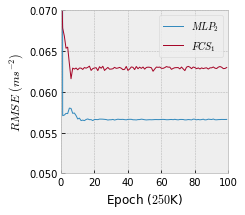

In [65]:
# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('Epoch ($250$K)')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(*EPOCHS_X_LIM)
ax.set_ylim(0.05, 0.07)
for architecture, df in lm_rms_dfs.items():
    ax.plot(df['test'], label=architecture)
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/lm-comparison-between-best-mlp-and-fcs-architecture-rms.pdf', bbox_inches='tight')    

### Aproximación al conjunto de test por las arquitecturas

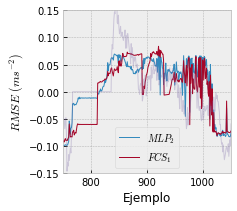

In [67]:
# Aproximación al conjunto de error
lm_outs_df = pd.DataFrame()
for architecture, df in lm_out_dfs.items():
    lm_outs_df[architecture] = df['real']

# Detail
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('Ejemplo')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(750, 1050)
ax.set_ylim(-0.15, 0.15)
lm_outs_df.plot(ax=ax);
ax.plot(df['expected'], alpha=0.3, linewidth=1, label='expected');
fig.savefig('thesis-figures/comparison-between-best-mlp-and-fcs-architecture-acceleration-profile-detail.pdf', bbox_inches='tight')

***

# Modelo de cambio de carril

## Representación de datos

El path a la nube de puntos de ejemplo que representaremos es el siguiente:

In [68]:
example_pointcloud_path = 'thesis-figures/data/example_pointcloud.csv'
pc = PointCloud.load(example_pointcloud_path).transform(**{'rot_y': 3.1, 'rot_z': -3.1}).roi(25,-25, 25,-25, 25, -25)

### Mapa de profundidad

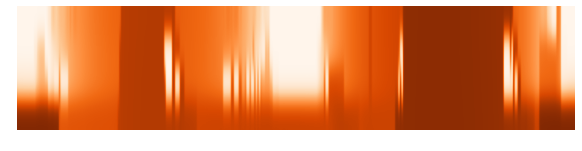

In [76]:
dm = pc.to_deepmap(h_range=(0, 360), v_range=(-7, 3), h_res=1, v_res=2).normalize(orig=[-25, 25], dest=[1, 0])

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(dm.matrix, cmap=plt.cm.Oranges, interpolation='gaussian')
ax.set_axis_off()
ax.set_facecolor(None)
ax.set_aspect(20)
fig.savefig('thesis-figures/deepness-map.pdf', bbox_inches='tight')

### Mirroring

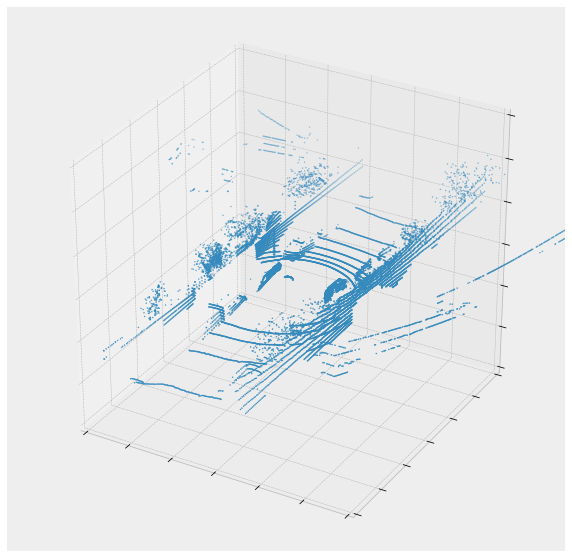

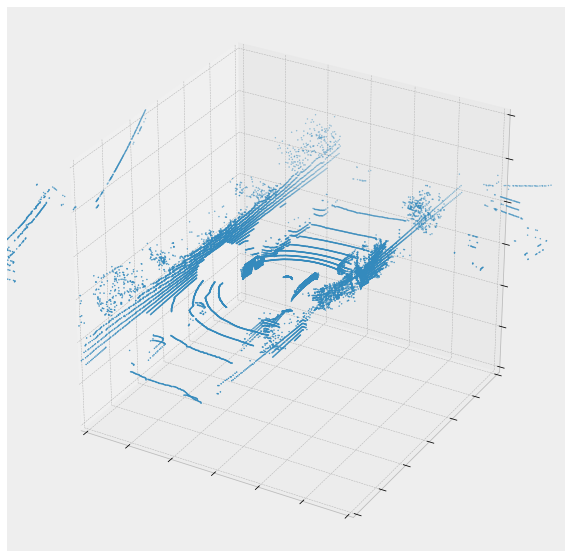

In [70]:
# Normal image
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(-15, 15)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.scatter(pc.points[:,1], pc.points[:,0], pc.points[:,2], s=1);
fig.savefig('thesis-figures/base-pointcloud.png', bbox_inches='tight')
# Mirror image
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(-15, 15)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
mpc = pc.mirror(fix_x=True, fix_z=True)
ax.scatter(mpc.points[:,1], mpc.points[:,0], mpc.points[:,2], s=1);
fig.savefig('thesis-figures/mirrored-pointcloud.png', bbox_inches='tight')

### Shaking

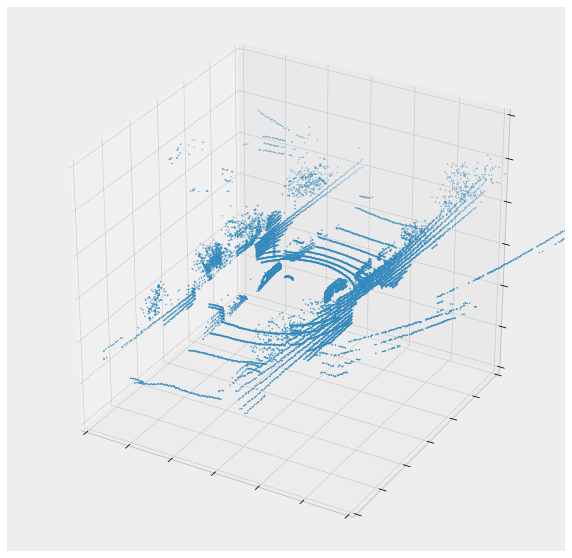

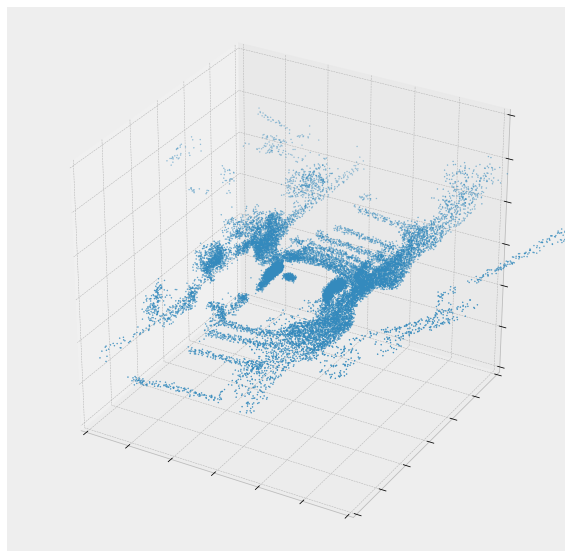

In [73]:
# Normal image
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(-15, 15)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
spc1 = pc.shake(shift_x=0.05, shift_y=0.05, shift_z=0.05)
ax.scatter(spc1.points[:,1], spc1.points[:,0], spc1.points[:,2], s=1);
fig.savefig('thesis-figures/shaken-pointcloud-05.png', bbox_inches='tight')
# Mirror image
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(-15, 15)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
spc2 = pc.shake(shift_x=0.3, shift_y=0.3, shift_z=0.3)
ax.scatter(spc2.points[:,1], spc2.points[:,0], spc2.points[:,2], s=1);
fig.savefig('thesis-figures/shaken-pointcloud-2.png', bbox_inches='tight')

## Descripción de los datasets

In [77]:
lc_dataset_description = {
    'subject': [],
    'Size training': [],
    'LC training': [],
    'RC training': [],
    'Size test': [],
    'LC test': [],
    'RC test': [],
}
#for subject, code in SUBJECTS.items():
#    # Training
#    df = pd.read_csv('data/lc-{}-training.csv'.format(subject), index_col=None, dtype=np.int8)
#    lc_dataset_description['subject'].append(code)
#    lc_dataset_description['Size training'].append(len(df))
#    lc_dataset_description['LC training'].append(len(df.loc[(np.isclose(df['Lane change left'], 1))]))
#    lc_dataset_description['RC training'].append(len(df.loc[(np.isclose(df['Lane change right'], 1))]))
#    
#    # Test
#    df = pd.read_csv('data/lc-{}-validation.csv'.format(subject), index_col=None, dtype=np.int8)
#    lc_dataset_description['Size test'].append(len(df))
#    lc_dataset_description['LC test'].append(len(df.loc[(np.isclose(df['Lane change left'], 1))]))
#    lc_dataset_description['RC test'].append(len(df.loc[(np.isclose(df['Lane change right'], 1))]))
#lc_dataset_description = pd.DataFrame(lc_dataset_description)
#lc_dataset_description[['Size training', 'Size test', 'LC training', 'RC training', 'LC test', 'RC test']]

## Perceptrón multicapa

In [113]:
lc_mlp_rms_f_pat = 'final-outputs/lc-mlp-accuracy-all-*.csv'
lc_mlp_out_f_pat = 'final-outputs/lc-mlp-outputs-all-*.csv'

Extraemos los datos de los ficheros a sus respectivos dataframes para trabajar con ellos

In [114]:
lc_mlp_acc_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lc_mlp_rms_f_pat), key=lambda x: (len(x), x))
]
lc_mlp_out_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lc_mlp_out_f_pat), key=lambda x: (len(x), x))
]

Por último, sacamos los nombres de las arquitecturas

In [115]:
lc_mlp_architectures = {
    s.replace('.csv', '').replace(lc_mlp_rms_f_pat[:-5], ''): '$MLP_{}$'.format(i)
    for i, s in enumerate(sorted(glob.glob(lc_mlp_rms_f_pat), key=lambda x: (len(x), x)), start=1)
}

### Tabla de precisión

In [116]:
table = {
    'architecture':[],
    'training':[],
    'validation':[],
    'test':[],
}
for i, (architecture, df) in enumerate(zip(lc_mlp_architectures, lc_mlp_acc_dfs)):
    table['architecture'].append(lc_mlp_architectures[architecture])
    table['training'].append(df['training'].iloc[-1])
    table['validation'].append(df['validation'].iloc[-1])
    table['test'].append(df['test'].iloc[-1])
df = pd.DataFrame(table, index=None)
df.set_index('architecture')

,test,training,validation
architecture,,,
$MLP_1$,0.333333,0.333333,0.333333
$MLP_2$,0.333333,0.333333,0.333333
$MLP_3$,0.333333,0.333333,0.333333


### Precisión en training, validation y test

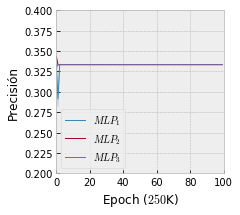

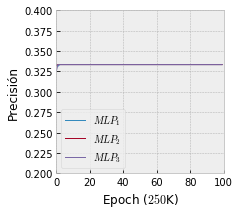

In [117]:
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('Epoch ($250$K)')
ax.set_ylabel('Precisión')
ax.set_xlim(*EPOCHS_X_LIM)
ax.set_ylim(0.2, 0.4)
stage_df = pd.DataFrame()
lines_training = []
lines_validation = []
for i, (architecture, df) in enumerate(zip(lc_mlp_architectures, lc_mlp_acc_dfs)):
    lines_training += ax.plot(df['training'], label=lc_mlp_architectures[architecture], color='C{}'.format(i))
    lines_validation += ax.plot(df['validation'], color='C{}'.format(i), alpha=0.3)
ax.legend(handles=lines_training, loc=3)
fig.savefig('thesis-figures/lc-mlp-acc-all-training-and-validation-detail.pdf', bbox_inches='tight')

# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('Epoch ($250$K)')
ax.set_ylabel('Precisión')
ax.set_xlim(*EPOCHS_X_LIM)
ax.set_ylim(0.2, 0.4)
for i, (architecture, df) in enumerate(zip(lc_mlp_architectures, lc_mlp_acc_dfs)):
    lines_training += ax.plot(df['test'], label=lc_mlp_architectures[architecture], color='C{}'.format(i))
ax.legend(*ax.get_legend_handles_labels(), loc=3)
fig.savefig('thesis-figures/lc-mlp-acc-all-test-detail.pdf', bbox_inches='tight')

Después de estos resoltados, ya no se hace nada con MLP para cambio de carril

## Redes de convolución

In [118]:
lc_cnn_rms_f_pat = 'final-outputs/lc-cnn-accuracy-all-*.csv'
lc_cnn_out_f_pat = 'final-outputs/lc-cnn-outputs-all-*.csv'

Extraemos los datos de los ficheros a sus respectivos dataframes para trabajar con ellos

In [119]:
lc_cnn_acc_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lc_cnn_rms_f_pat), key=lambda x: (len(x), x))
]
lc_cnn_out_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lc_cnn_out_f_pat), key=lambda x: (len(x), x))
]

Por último, sacamos los nombres de las arquitecturas

In [120]:
lc_cnn_architectures = {
    s.replace('.csv', '').replace(lc_cnn_rms_f_pat[:-5], ''): '$CNN_{}$'.format(i)
    for i, s in enumerate(sorted(glob.glob(lc_cnn_rms_f_pat), key=lambda x: (len(x), x)), start=1)
}

### Tabla de precisión

In [121]:
table = {
    'architecture':[],
    'training':[],
    'validation':[],
    'test':[],
    'topology':[]
}
for i, (architecture, df) in enumerate(zip(lc_cnn_architectures, lc_cnn_acc_dfs)):
    table['architecture'].append(lc_cnn_architectures[architecture])
    table['training'].append(df['training'].iloc[-1])
    table['validation'].append(df['validation'].iloc[-1])
    table['test'].append(df['test'].iloc[-1])
    table['topology'].append(architecture)
df = pd.DataFrame(table, index=None)[['architecture', 'training', 'validation', 'test', 'topology']]
df.set_index('architecture')

,training,validation,test,topology
architecture,,,,
$CNN_1$,0.588667,0.5760,0.573333,c16-4-18-v-d128-d0.1
$CNN_2$,0.506667,0.5315,0.518333,c64-5-36-v-c256-3-5-v-d256-d128-d16-d0.1
$CNN_3$,0.561333,0.5690,0.554000,c16-3-18-v-c32-3-18-v-c64-2-18-v-d128-d0.1


### Precisión en training, validation y test

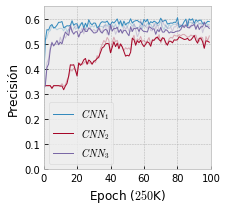

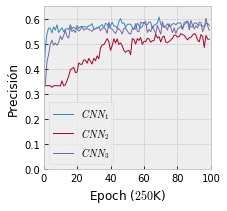

In [122]:
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('Epoch ($250$K)')
ax.set_ylabel('Precisión')
ax.set_xlim(*EPOCHS_X_LIM)
ax.set_ylim(0, 0.65)
stage_df = pd.DataFrame()
lines_training = []
lines_validation = []
for i, (architecture, df) in enumerate(zip(lc_cnn_architectures, lc_cnn_acc_dfs)):
    lines_training += ax.plot(df['training'], label=lc_cnn_architectures[architecture], color='C{}'.format(i))
    lines_validation += ax.plot(df['validation'], color='C{}'.format(i), alpha=0.3)
ax.legend(handles=lines_training, loc=3)
fig.savefig('thesis-figures/lc-cnn-acc-all-training-and-validation-detail.pdf', bbox_inches='tight')

# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
ax.set_xlabel('Epoch ($250$K)')
ax.set_ylabel('Precisión')
ax.set_xlim(*EPOCHS_X_LIM)
ax.set_ylim(0, 0.65)
for i, (architecture, df) in enumerate(zip(lc_cnn_architectures, lc_cnn_acc_dfs)):
    lines_training += ax.plot(df['test'], label=lc_cnn_architectures[architecture], color='C{}'.format(i))
ax.legend(*ax.get_legend_handles_labels(), loc=3)
fig.savefig('thesis-figures/lc-cnn-acc-all-test-detail.pdf', bbox_inches='tight')

### Learning rate decay

Grafiquita para que se vea cómo evoluciona en nuestros experimentos

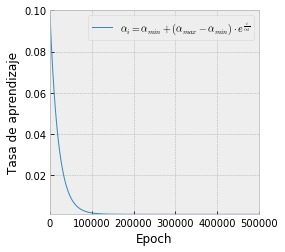

In [123]:
MIN_LEARN_RATE = 0.001
MAX_LEARN_RATE = 0.1
DECAY_SPEED = 20000
EPOCHS = 500000
MINIBATCH_SIZE = 25000

X = np.arange(EPOCHS)
Y = MIN_LEARN_RATE + (MAX_LEARN_RATE - MIN_LEARN_RATE) * np.exp(-X / DECAY_SPEED)

fig, ax = plt.subplots(1, 1, figsize=SQUARED_M)
ax.set_xlabel('Epoch')
ax.set_ylabel('Tasa de aprendizaje')
ax.set_xlim(0, X[-1])
ax.set_ylim(MIN_LEARN_RATE, MAX_LEARN_RATE)
ax.plot(X, Y, label=r'$\alpha_i = \alpha_{min} + (\alpha_{max} - \alpha_{min}) \cdot e^\frac{i}{\alpha_d}$')
ax.legend(*ax.get_legend_handles_labels());
fig.savefig('thesis-figures/lc-learning-rate-decay.pdf', bbox_inches='tight')    

## Comparación entre modelos

### Matriz de confusión

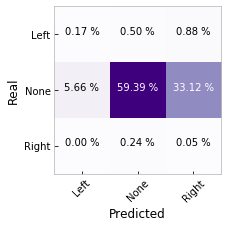

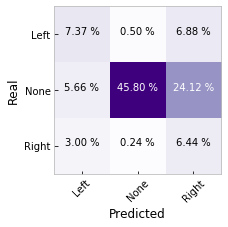

In [124]:
best_architecture = 'c16-4-18-v-d128-d0.1'
df = pd.read_csv('final-outputs/lc-cnn-outputs-all-{}.csv'.format(best_architecture), index_col=None)
df.iloc[1,1] = 2

matrix = confusion_matrix(df['Real classes'], df['Predicted'])
matrix = matrix / np.sum(matrix) * 100

fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
fig.tight_layout()
plot_confusion_matrix(ax, matrix, ['Left', 'None', 'Right'])

matrix = np.array([
    [7.37, 0.50, 6.88],
    [5.66, 45.80, 24.12],
    [3.00, 0.24, 6.44],
])
fig, ax = plt.subplots(1, 1, figsize=SQUARED_2)
fig.tight_layout()
plot_confusion_matrix(ax, matrix, ['Left', 'None', 'Right'])
fig.savefig('thesis-figures/lc-cnn-model-confussion-matrix.pdf', bbox_inches='tight')

***

# Modelos específicos

## Modelo longitudinal

In [125]:
lm_specific_rms_f_pat = 'final-outputs/cf-mlp-rms-*-7-8-2-1.csv'
lm_specific_out_f_pat = 'final-outputs/cf-mlp-outputs*-7-8-2-1.csv'

Extraemos los datos de los ficheros a sus respectivos dataframes para trabajar con ellos

In [126]:
lm_specific_rms_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lm_specific_rms_f_pat))
]
lm_specific_out_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lm_specific_out_f_pat))
]

Por último sacamos los sujetos

In [127]:
lm_specific_subjects = {}
for i, s in enumerate(sorted(glob.glob(lm_specific_rms_f_pat))):
    subject = s.replace('-7-8-2-1.csv', '').replace(lm_specific_rms_f_pat[:-13], '')
    name = '$S_A$' if subject == 'all' else '$S_{}$'.format(i)
    lm_specific_subjects[subject] = name

### Tabla de errores

In [128]:
table = {
    'subject':[],
    'training':[],
    'validation':[],
    'test':[],
}
for i, (subject, df) in enumerate(zip(lm_specific_subjects, lm_specific_rms_dfs)):
    table['subject'].append(lm_specific_subjects[subject])
    table['training'].append(df['training'].iloc[-1])
    table['validation'].append(df['validation'].iloc[-1])
    table['test'].append(df['test'].iloc[-1])
df = pd.DataFrame(table, index=None)[['subject', 'training', 'validation', 'test']]
df.set_index('subject')

,training,validation,test
subject,,,
$S_A$,0.056341,0.061951,0.056607
$S_1$,0.044890,0.038777,0.059773
$S_2$,0.048782,0.047387,0.058120
$S_3$,0.055814,0.054249,0.057577


### RMSE en test

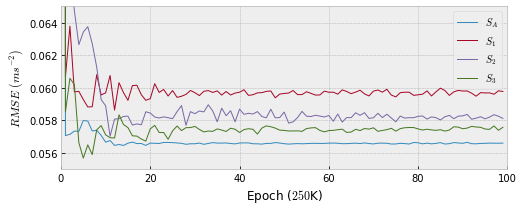

In [129]:
# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1, figsize=WIDE_1)
ax.set_xlabel('Epoch ($250$K)')
ax.set_ylabel('$RMSE$ $(ms^{-2})$')
ax.set_xlim(*EPOCHS_X_LIM)
ax.set_ylim(0.055, 0.065)
for i, (subject, df) in enumerate(zip(lm_specific_subjects, lm_specific_rms_dfs)):
    lines_training += ax.plot(df['test'], label=lm_specific_subjects[subject], color='C{}'.format(i))
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/lm-specific-rmse-all-test-detail.pdf', bbox_inches='tight')

## Modelo de cambio de carril

In [130]:
best_cnn_arch = 'c16-4-18-v-d128-d0.1'
lc_specific_acc_f_pat = 'final-outputs/lc-cnn-accuracy-*-{}.csv'.format(best_cnn_arch)
lc_specific_out_f_pat = 'final-outputs/lc-cnn-outputs*-{}.csv'.format(best_cnn_arch)

Extraemos los datos de los ficheros a sus respectivos dataframes para trabajar con ellos

In [131]:
lc_specific_acc_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lc_specific_acc_f_pat))
]
lc_specific_out_dfs = [
    pd.read_csv(f, index_col=None)
    for f in sorted(glob.glob(lc_specific_out_f_pat))
]

Por último sacamos los sujetos

In [132]:
lc_specific_subjects = SUBJECTS_WITH_ALL

### Tabla de precisiones

In [133]:
table = {
    'subject':[],
    'training':[],
    'validation':[],
    'test':[],
}
for i, (subject, df) in enumerate(zip(SUBJECTS_WITH_ALL.keys(), lc_specific_acc_dfs)):
    table['subject'].append(SUBJECTS_WITH_ALL[subject])
    table['training'].append(df['training'].iloc[-1])
    table['validation'].append(df['validation'].iloc[-1])
    table['test'].append(df['test'].iloc[-1])
df = pd.DataFrame(table, index=None)[['subject', 'training', 'validation', 'test']]
df.set_index('subject')

,training,validation,test
subject,,,
$S_A$,0.588667,0.576000,0.573333
$S_1$,0.805333,0.763333,0.768333
$S_2$,0.683667,0.708333,0.705667
$S_3$,0.727432,0.705676,0.710428


### RMSE en training, validation y test

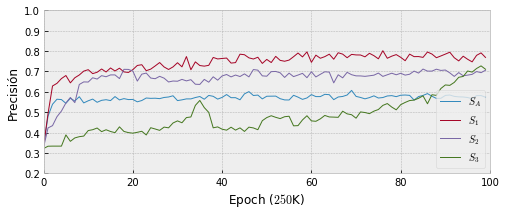

In [134]:
# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1, figsize=WIDE_1)
ax.set_xlabel('Epoch ($250$K)')
ax.set_ylabel('Precisión')
ax.set_xlim(*(EPOCHS_X_LIM))
ax.set_ylim(0.2, 1)
for i, (subject, df) in enumerate(zip(SUBJECTS_WITH_ALL.keys(), lc_specific_acc_dfs)):
    ax.plot(df['test'], label=SUBJECTS_WITH_ALL[subject], color='C{}'.format(i))
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/lc-specific-rmse-all-test-detail.pdf', bbox_inches='tight')

## Comprobación de personalización de los modelos de conducción específicos

### En modelo longitudinal

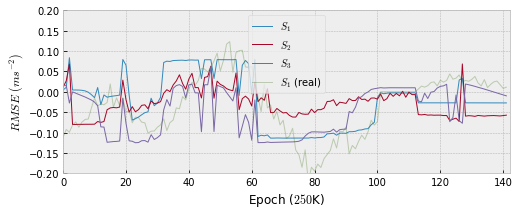

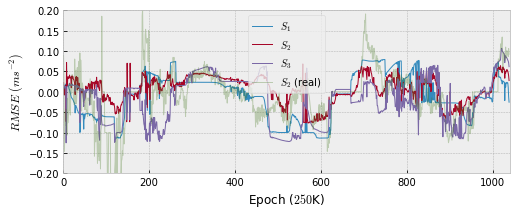

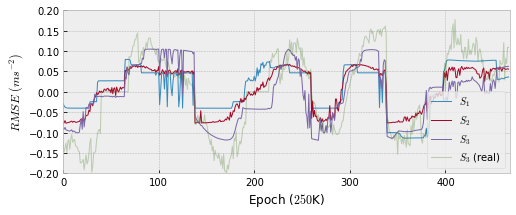

In [136]:
for subject, code in SUBJECTS.items():
    lm_comparison_df = pd.read_csv('final-outputs/cf-subjects-{}.csv'.format(subject), index_col=None)
    # Perfil de aceleración
    fig, ax = plt.subplots(1, 1, figsize=WIDE_1)
    ax.set_xlabel('Epoch ($250$K)')
    ax.set_ylabel('$RMSE$ $(ms^{-2})$')
    ax.set_xlim(0, len(lm_comparison_df))
    ax.set_ylim(-0.2, 0.2)
    for s, c in SUBJECTS.items():
        lm_comparison_df[s].plot(ax=ax, label=c);
    ax.plot(lm_comparison_df['expected'], alpha=0.3, linewidth=1, label=code + ' (real)');
    ax.legend(*ax.get_legend_handles_labels())
    fig.savefig('thesis-figures/lm-subjects-comparison-with-{}-acceleration-profiles.pdf'.format(subject), bbox_inches='tight')

In [137]:
for subject, code in SUBJECTS.items():
    lm_comparison_df = pd.read_csv('final-outputs/cf-subjects-{}.csv'.format(subject), index_col=None)
    df = pd.DataFrame(
        data={
            'subject': [code],
            SUBJECTS['edgar']: [np.sqrt(mean_squared_error(lm_comparison_df['expected'], lm_comparison_df['edgar']))],
            SUBJECTS['jj']: [np.sqrt(mean_squared_error(lm_comparison_df['expected'], lm_comparison_df['jj']))],
            SUBJECTS['miguel']: [np.sqrt(mean_squared_error(lm_comparison_df['expected'], lm_comparison_df['miguel']))],
        },
        index=None
    )
    df.set_index('subject')
    display(df)

,$S_1$,$S_2$,$S_3$,subject
0,0.059783,0.074384,0.070744,$S_1$


,$S_1$,$S_2$,$S_3$,subject
0,0.054195,0.058231,0.067655,$S_2$


,$S_1$,$S_2$,$S_3$,subject
0,0.065544,0.055366,0.057586,$S_3$


### En cambio de carril

In [138]:
MAP = {
    'Lane change left edgar': 0,
    'Lane change none edgar': 1,
    'Lane change right edgar': 2,
    'Lane change left miguel': 0,
    'Lane change none miguel': 1,
    'Lane change right miguel': 2,
    'Lane change left jj': 0,
    'Lane change none jj': 1,
    'Lane change right jj': 2,
    'Lane change left': 0,
    'Lane change none': 1,
    'Lane change right': 2,
}

data = {}
for subject, code in SUBJECTS.items():
    lc_comparison_df = pd.read_csv('final-outputs/lc-subjects-{}.csv'.format(subject), index_col=None)
    lc_comparison_df['expected'] = lc_comparison_df[['Lane change left', 'Lane change none', 'Lane change right']].idxmax(axis=1).apply(lambda x: MAP[x])
    lc_comparison_df['edgar'] = lc_comparison_df[[c for c in lc_comparison_df.columns if c.endswith('edgar')]].idxmax(axis=1).apply(lambda x: MAP[x])
    lc_comparison_df['jj'] = lc_comparison_df[[c for c in lc_comparison_df.columns if c.endswith('jj')]].idxmax(axis=1).apply(lambda x: MAP[x])
    lc_comparison_df['miguel'] = lc_comparison_df[[c for c in lc_comparison_df.columns if c.endswith('miguel')]].idxmax(axis=1).apply(lambda x: MAP[x])
    df = pd.DataFrame(
        data={
            'subject': [code],
            SUBJECTS['edgar']: [accuracy_score(lc_comparison_df['expected'], lc_comparison_df['edgar'])],
            SUBJECTS['jj']: [accuracy_score(lc_comparison_df['expected'], lc_comparison_df['jj'])],
            SUBJECTS['miguel']: [accuracy_score(lc_comparison_df['expected'], lc_comparison_df['miguel'])],
        },
        index=None
    )
    df.set_index('subject')
    display(df)

,$S_1$,$S_2$,$S_3$,subject
0,0.969859,0.953816,0.907632,$S_1$


,$S_1$,$S_2$,$S_3$,subject
0,0.990644,0.990644,0.990644,$S_2$


,$S_1$,$S_2$,$S_3$,subject
0,0.96609,0.960554,0.940138,$S_3$


# Implementación en simulador

Esta parte es más costosa computacionalmente porque tiene que trabajar con los conjuntos de datos y los de cambio de carril son tochérrimos.

In [139]:
real_data_df = pd.DataFrame(
    None,
    index=pd.MultiIndex.from_product(
        [['V', 'AP', 'AN', 'JFF', 'JIF', 'JIM', 'JLC', 'LC', 'RC'], ['Real', 'Sim']],
        names=['Indicador', 'Entorno']
    ),
    columns=['$S_A$ ($\mu$)', '$S_A$ ($\sigma$)', '$S_1$ ($\mu$)', '$S_1$ ($\sigma$)', '$S_2$ ($\mu$)', '$S_2$ ($\sigma$)', '$S_3$ ($\mu$)', '$S_3$ ($\sigma$)']
)

for subject, code in SUBJECTS_WITH_ALL.items():
    # Datos de modelo longitudinal (reales)
    df = pd.read_csv('data/cf-{}-validation.csv'.format(subject), index_col=None, dtype=np.float32)
    # Speed
    real_data_df.loc[('V', 'Real'),'{} ($\mu$)'.format(code)] = df['Speed'].mean()
    real_data_df.loc[('V', 'Real'),'{} ($\sigma$)'.format(code)] = df['Speed'].std()
    # Acceleration
    real_data_df.loc[('AP', 'Real'),'{} ($\mu$)'.format(code)] = df.loc[df['Acceleration'] > 0]['Acceleration'].mean()
    real_data_df.loc[('AP', 'Real'),'{} ($\sigma$)'.format(code)] = df.loc[df['Acceleration'] > 0]['Acceleration'].std()
    real_data_df.loc[('AN', 'Real'),'{} ($\mu$)'.format(code)] = df.loc[df['Acceleration'] < 0]['Acceleration'].mean()
    real_data_df.loc[('AN', 'Real'),'{} ($\sigma$)'.format(code)] = df.loc[df['Acceleration'] < 0]['Acceleration'].std()
    # Jerk
    df['Jerk'] = (df['Acceleration'].shift(-1) - df['Acceleration'])[:-1]
    real_data_df.loc[('JIM', 'Real'),'{} ($\mu$)'.format(code)] = df.loc[(df['Jerk'] > 0) & (df['Acceleration'] > 0)]['Jerk'].mean()
    real_data_df.loc[('JIM', 'Real'),'{} ($\sigma$)'.format(code)] = df.loc[(df['Jerk'] > 0) & (df['Acceleration'] > 0)]['Jerk'].std()
    real_data_df.loc[('JLC', 'Real'),'{} ($\mu$)'.format(code)] = df.loc[(df['Jerk'] > 0) & (df['Acceleration'] < 0)]['Jerk'].mean()
    real_data_df.loc[('JLC', 'Real'),'{} ($\sigma$)'.format(code)] = df.loc[(df['Jerk'] > 0) & (df['Acceleration'] < 0)]['Jerk'].std()
    real_data_df.loc[('JIF', 'Real'),'{} ($\mu$)'.format(code)] = df.loc[(df['Jerk'] < 0) & (df['Acceleration'] < 0)]['Jerk'].mean()
    real_data_df.loc[('JIF', 'Real'),'{} ($\sigma$)'.format(code)] = df.loc[(df['Jerk'] < 0) & (df['Acceleration'] < 0)]['Jerk'].std()
    real_data_df.loc[('JFF', 'Real'),'{} ($\mu$)'.format(code)] = df.loc[(df['Jerk'] < 0) & (df['Acceleration'] > 0)]['Jerk'].mean()
    real_data_df.loc[('JFF', 'Real'),'{} ($\sigma$)'.format(code)] = df.loc[(df['Jerk'] < 0) & (df['Acceleration'] > 0)]['Jerk'].std()

    # Datos de cambio de carril (reales)
    df = pd.read_csv('data/lc-{}-validation.csv'.format(subject), index_col=None, dtype=np.float32)
    real_data_df.loc[('LC', 'Real'),'{} ($\mu$)'.format(code)] = len(df.loc[(np.isclose(df['Lane change left'], 1))]) // 10
    real_data_df.loc[('RC', 'Real'),'{} ($\mu$)'.format(code)] = len(df.loc[(np.isclose(df['Lane change right'], 1))]) // 10

    # Datos de modelo longitudinal (simulados)
    df = pd.read_csv('final-outputs/cf-mlp-outputs-{}-7-8-2-1.csv'.format(subject), index_col=None, dtype=np.float32)
    # Acceleration
    real_data_df.loc[('AP', 'Sim'),'{} ($\mu$)'.format(code)] = df.loc[df['real'] > 0]['real'].mean()
    real_data_df.loc[('AP', 'Sim'),'{} ($\sigma$)'.format(code)] = df.loc[df['real'] > 0]['real'].std()
    real_data_df.loc[('AN', 'Sim'),'{} ($\mu$)'.format(code)] = df.loc[df['real'] < 0]['real'].mean()
    real_data_df.loc[('AN', 'Sim'),'{} ($\sigma$)'.format(code)] = df.loc[df['real'] < 0]['real'].std()
    # Jerk
    df['Jerk'] = (df['real'].shift(-1) - df['real'])[:-1]
    real_data_df.loc[('JIM', 'Sim'),'{} ($\mu$)'.format(code)] = df.loc[(df['Jerk'] > 0) & (df['real'] > 0)]['Jerk'].mean()
    real_data_df.loc[('JIM', 'Sim'),'{} ($\sigma$)'.format(code)] = df.loc[(df['Jerk'] > 0) & (df['real'] > 0)]['Jerk'].std()
    real_data_df.loc[('JLC', 'Sim'),'{} ($\mu$)'.format(code)] = df.loc[(df['Jerk'] > 0) & (df['real'] < 0)]['Jerk'].mean()
    real_data_df.loc[('JLC', 'Sim'),'{} ($\sigma$)'.format(code)] = df.loc[(df['Jerk'] > 0) & (df['real'] < 0)]['Jerk'].std()
    real_data_df.loc[('JIF', 'Sim'),'{} ($\mu$)'.format(code)] = df.loc[(df['Jerk'] < 0) & (df['real'] < 0)]['Jerk'].mean()
    real_data_df.loc[('JIF', 'Sim'),'{} ($\sigma$)'.format(code)] = df.loc[(df['Jerk'] < 0) & (df['real'] < 0)]['Jerk'].std()
    real_data_df.loc[('JFF', 'Sim'),'{} ($\mu$)'.format(code)] = df.loc[(df['Jerk'] < 0) & (df['real'] > 0)]['Jerk'].mean()
    real_data_df.loc[('JFF', 'Sim'),'{} ($\sigma$)'.format(code)] = df.loc[(df['Jerk'] < 0) & (df['real'] > 0)]['Jerk'].std()

    # Datos de cambio de carril (reales)
    df = pd.read_csv('final-outputs/lc-cnn-outputs-{}-c16-4-18-v-d128-d0.1.csv'.format(subject), index_col=None, dtype=np.float32)
    real_data_df.loc[('LC', 'Sim'),'{} ($\mu$)'.format(code)] = len(df.loc[(np.isclose(df['Predicted'], 1))]) // 100
    real_data_df.loc[('RC', 'Sim'),'{} ($\mu$)'.format(code)] = len(df.loc[(np.isclose(df['Predicted'], -1))]) // 100
real_data_df


FileNotFoundError: File b'data/cf-all-validation.csv' does not exist

### Comparación de los modelos longitudinales (media)

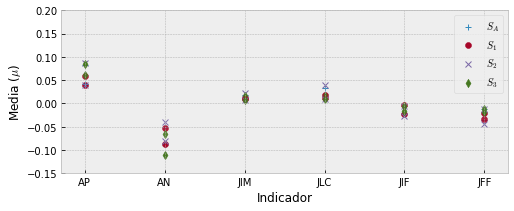

In [143]:
columns = ['AP', 'AN', 'JIM', 'JLC', 'JIF', 'JFF']
lm_indicators_real_data_means = {
    '$S_A$':[0.082, -0.088, 0.019, 0.032, -0.023, -0.035],
    '$S_1$':[0.039, -0.087, 0.011, 0.019, -0.022, -0.021],
    '$S_2$':[0.086, -0.080, 0.023, 0.039, -0.026, -0.045],
    '$S_3$':[0.084, -0.110, 0.015, 0.016, -0.016, -0.018],
}
lm_indicators_simu_data_means = {
    '$S_A$':[0.042, -0.050, 0.007, 0.009, -0.005, -0.012],
    '$S_1$':[0.058, -0.053, 0.009, 0.012, -0.003, -0.034],
    '$S_2$':[0.039, -0.039, 0.008, 0.010, -0.005, -0.011],
    '$S_3$':[0.060, -0.065, 0.007, 0.010, -0.005, -0.013],
}

fig, ax = plt.subplots(1, 1, figsize=WIDE_1)
ax.set_xlabel('Indicador')
ax.set_ylabel('Media ($\mu$)')
markers = ['+', 'o', 'x', 'd']
ax.set_ylim(-.15, .2)
for i, (label, data) in enumerate(lm_indicators_real_data_means.items()):
    ax.scatter(columns, data, alpha=1, label=label, color='C' + str(i), marker=markers[i]);
for i, (_, data) in enumerate(lm_indicators_simu_data_means.items()):
    ax.scatter(columns, data, alpha=.9, color='C' + str(i), marker=markers[i]);
#ax.legend(loc='best', mode='expand', ncol=8);
ax.legend(loc='best')
fig.savefig('thesis-figures/lc-global-comparison-indicators-means.pdf', bbox_inches='tight')

### Comparación de los modelos longitudinales (desviación típica)

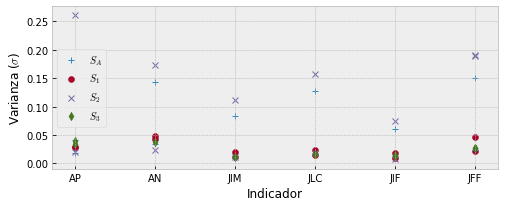

In [144]:
columns = ['AP', 'AN', 'JIM', 'JLC', 'JIF', 'JFF']
lm_indicators_real_data_stds = {
    '$S_A$':[0.042, 0.144, 0.084, 0.127, 0.060, 0.151],
    '$S_1$':[0.029, 0.048, 0.011, 0.015, 0.019, 0.022],
    '$S_2$':[0.260, 0.173, 0.112, 0.157, 0.074, 0.191],
    '$S_3$':[0.040, 0.041, 0.013, 0.016, 0.014, 0.027],
}
lm_indicators_simu_data_stds = {
    '$S_A$':[0.019, 0.034, 0.009, 0.018, 0.010, 0.023],
    '$S_1$':[0.029, 0.043, 0.020, 0.024, 0.010, 0.047],
    '$S_2$':[0.021, 0.024, 0.011, 0.019, 0.008, 0.188],
    '$S_3$':[0.035, 0.038, 0.011, 0.017, 0.013, 0.027],
}

fig, ax = plt.subplots(1, 1, figsize=WIDE_1)
ax.set_xlabel('Indicador')
ax.set_ylabel('Varianza ($\sigma$)')
markers = ['+', 'o', 'x', 'd']
for i, (label, data) in enumerate(lm_indicators_real_data_stds.items()):
    ax.scatter(columns, data, alpha=1, label=label, color='C' + str(i), marker=markers[i]);
for i, (_, data) in enumerate(lm_indicators_simu_data_stds.items()):
    ax.scatter(columns, data, alpha=1, color='C' + str(i), marker=markers[i]);
#ax.legend(loc='best', mode='expand', ncol=8);
ax.legend(loc='best')
fig.savefig('thesis-figures/lc-global-comparison-indicators-stds.pdf', bbox_inches='tight')

## Apéndices: Ajuste de controlador difuso basado en descenso del gradiente

La definición del controlador es la siguiente

In [145]:
import fuzzle.controller
import fuzzle.defuzz
import fuzzle.lvars
import fuzzle.mfs
import fuzzle.operators
import fuzzle.rules

fz_service = fuzzle.lvars.InputLVar('service', (0, 10))
fz_service['bad'] = fuzzle.mfs.LineDescMF(5, 6)
fz_service['average'] = fuzzle.mfs.TrapMF(5, 6, 7, 9)
fz_service['good'] = fuzzle.mfs.LineAscMF(7, 9)

fz_food = fuzzle.lvars.InputLVar('food', (0, 10))
fz_food['bad'] = fuzzle.mfs.LineDescMF(5, 8)
fz_food['average'] = fuzzle.mfs.TriMF(5, 8, 9)
fz_food['good'] = fuzzle.mfs.LineAscMF(8, 9)

fz_tip = fuzzle.lvars.OutputLVar('tip', domain=(0, 25), defuzz=fuzzle.defuzz.CoGS())
fz_tip['low'] = fuzzle.mfs.SingletonMF(0)
fz_tip['high'] = fuzzle.mfs.SingletonMF(25)

rule_block = fuzzle.rules.RuleBlock(
    and_op=fuzzle.operators.Minimum(),
    or_op=fuzzle.operators.Maximum(),
    not_op=fuzzle.operators.Zadeh(),
    agg_op=fuzzle.operators.Minimum(),
    acc_op=fuzzle.operators.Maximum()
)
rule_block[1] = 'IF service IS good THEN tip IS high'
rule_block[2] = 'IF food IS good THEN tip IS high'
rule_block[3] = 'IF service IS good AND food IS average THEN tip IS low'
rule_block[4] = 'IF service IS average AND food IS good THEN tip IS high'
rule_block[5] = 'IF service IS bad THEN tip IS low'
rule_block[6] = 'IF food IS bad THEN tip IS low'

inputs = [fz_service, fz_food]
outputs = [fz_tip]

fcs = fuzzle.controller.FuzzyController(inputs, outputs, rule_block)

### Particiones difusas del controlador real

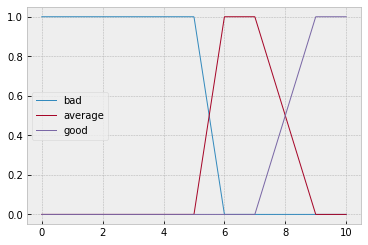

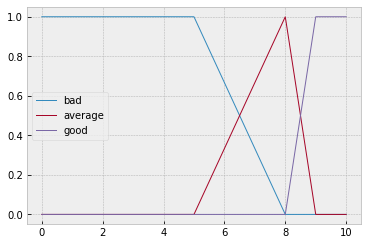

In [146]:
for var in inputs:
    mf_names = [fs for fs in var]
    X = np.linspace(*var.domain, 1000)
    Y = np.array([
        [var[mf_name](x) for mf_name in mf_names]
        for x in X
    ])

    # Plot the mfs
    fig, ax = plt.subplots(1, 1)
    for i, (column, label) in enumerate(zip(Y.T, mf_names)):
        ax.plot(X, column, alpha=1, label=label, color='C' + str(i));
    ax.legend(loc='best');
    fig.savefig('thesis-figures/real-tip-controller-var-{}.pdf'.format(var.name), bbox_inches='tight')

### Superficie del controlador real

/home/blazaid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.
  # Remove the CWD from sys.path while we load stuff.


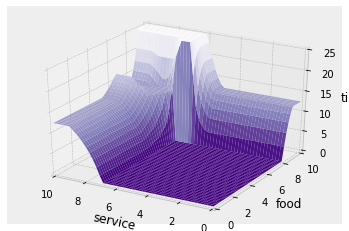

In [147]:
inferences = []
for x in np.linspace(*fz_service.domain, 50):
    for y in np.linspace(*fz_food.domain, 50):
        controller_inputs = {fz_service.name: x, fz_food.name: y}
        z = fcs.eval(controller_inputs)[fz_tip.name]
        inferences.append((x, y, z))
inferences = np.array(inferences)

X, Y = np.meshgrid(np.unique(inferences[:,0]), np.unique(inferences[:,1]))
Z = griddata(inferences[:,0], inferences[:,1], inferences[:,2], X, Y, interp='linear')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(max(fz_service.domain), min(fz_service.domain))
ax.set_ylim(min(fz_food.domain), max(fz_food.domain))
ax.set_zlim(min(fz_tip.domain), max(fz_tip.domain))
ax.set_xlabel(fz_service.name)
ax.set_ylabel(fz_food.name)
ax.set_zlabel(fz_tip.name)
ax.plot_surface(X, Y, Z, cmap=CMAP);
fig.savefig('thesis-figures/real-tip-controller-surface.pdf', bbox_inches='tight')

### Ajuste con controlador basado en descenso del gradiente

In [148]:
# Sacamos conjunto de datos aleatorios
random_idx = np.random.randint(inferences.shape[0], size=50000)
random_points = inferences[random_idx]
np.save('thesis-figures/data/real-tip-controller-random-data', random_points)

#### Superficie del controlador

/home/blazaid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.


KeyboardInterrupt: 

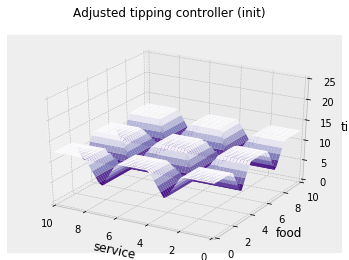

In [149]:
random_points = np.load('thesis-figures/data/real-tip-controller-random-data.npy')

# Creamos el controlador y lo ajustamos
LEARNING_RATE = 0.001
EPOCHS = 50000

tf.reset_default_graph()

service = tfz.IVar(name='service', fuzzy_sets=3, domain=(0, 10))
food = tfz.IVar(name='food', fuzzy_sets=3, domain=(0, 10))
tip = tfz.OVar(name='tip', values=(0, 25))

x, ŷ = tfz.fuzzy_controller(
    i_vars=[service, food],
    o_var=tip
)
y = tf.placeholder(tf.float32)
cost = tf.sqrt(tf.reduce_mean(tf.squared_difference(y, ŷ)))
train = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cost)

inputs = random_points[:,:2]
output = random_points[:,2][:,None]

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.suptitle('Adjusted tipping controller (init)')
    ax.set_xlim(max(fz_service.domain), min(fz_service.domain))
    ax.set_ylim(min(fz_food.domain), max(fz_food.domain))
    ax.set_zlim(min(fz_tip.domain), max(fz_tip.domain))
    ax.set_xlabel(fz_service.name)
    ax.set_ylabel(fz_food.name)
    ax.set_zlabel(fz_tip.name)
    inference_result = session.run(ŷ, feed_dict={x: inferences[:,:2]})
    X, Y = np.meshgrid(np.unique(inferences[:,0]), np.unique(inferences[:,1]))
    Z = griddata(inferences[:,0], inferences[:,1], inference_result.flatten(), X, Y, interp='linear')
    ax.plot_surface(X, Y, Z, cmap=CMAP);
    
    fig.savefig('thesis-figures/ajusted-tip-controller-at-init-training.pdf', bbox_inches='tight')

    feed_dict = {x: inputs, y: output}
    rmss = [session.run(cost, feed_dict={x: inferences[:,:2], y: inferences[:,2][:,None]})]
    for step in range(EPOCHS):
        session.run(train, feed_dict=feed_dict)

        if step == 1000:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            fig.suptitle('Adjusted tipping controller (after {} epochs)'.format(step))
            ax.set_xlim(max(fz_service.domain), min(fz_service.domain))
            ax.set_ylim(min(fz_food.domain), max(fz_food.domain))
            ax.set_zlim(min(fz_tip.domain), max(fz_tip.domain))
            ax.set_xlabel(fz_service.name)
            ax.set_ylabel(fz_food.name)
            ax.set_zlabel(fz_tip.name)    
            inference_result = session.run(ŷ, feed_dict={x: inferences[:,:2]})
            X, Y = np.meshgrid(np.unique(inferences[:,0]), np.unique(inferences[:,1]))
            Z = griddata(inferences[:,0], inferences[:,1], inference_result.flatten(), X, Y, interp='linear')
            ax.plot_surface(X, Y, Z, cmap=CMAP);
            fig.savefig('thesis-figures/ajusted-tip-controller-at-half-training.pdf', bbox_inches='tight')
        rmss.append(session.run(cost, feed_dict={x: inferences[:,:2], y: inferences[:,2][:,None]}))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.suptitle('Adjusted tipping controller (end)')
    ax.set_xlim(max(fz_service.domain), min(fz_service.domain))
    ax.set_ylim(min(fz_food.domain), max(fz_food.domain))
    ax.set_zlim(min(fz_tip.domain), max(fz_tip.domain))
    ax.set_xlabel(fz_service.name)
    ax.set_ylabel(fz_food.name)
    ax.set_zlabel(fz_tip.name)
    inference_result = session.run(ŷ, feed_dict={x: inferences[:,:2]})
    X, Y = np.meshgrid(np.unique(inferences[:,0]), np.unique(inferences[:,1]))
    Z = griddata(inferences[:,0], inferences[:,1], inference_result.flatten(), X, Y, interp='linear')
    ax.plot_surface(X, Y, Z, cmap=CMAP);
    fig.savefig('thesis-figures/ajusted-tip-controller-at-end-training.pdf', bbox_inches='tight')

# Impresión del RMS a lo largo del entrenamiento
fig, ax = plt.subplots(1, 1)
ax.set_title('RMS during training')
ax.plot(rmss)
fig.savefig('thesis-figures/fcs-ajustment-rms-during-training.pdf', bbox_inches='tight')
    

# Conclusiones